In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [4]:
titanic_df = pd.read_csv('train.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic_df['Pclass']=titanic_df['Pclass'].astype(str)

In [8]:
titanic_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

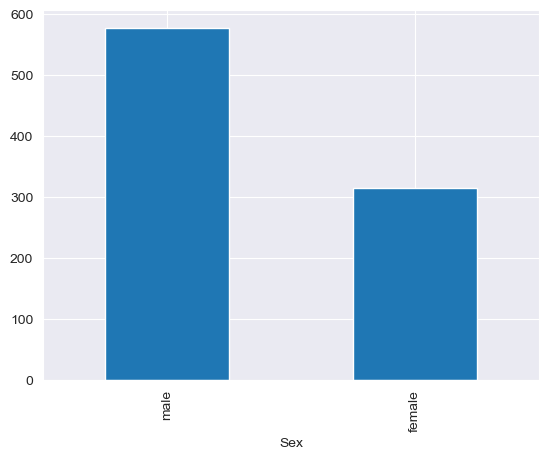

In [9]:
titanic_df.Sex.value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

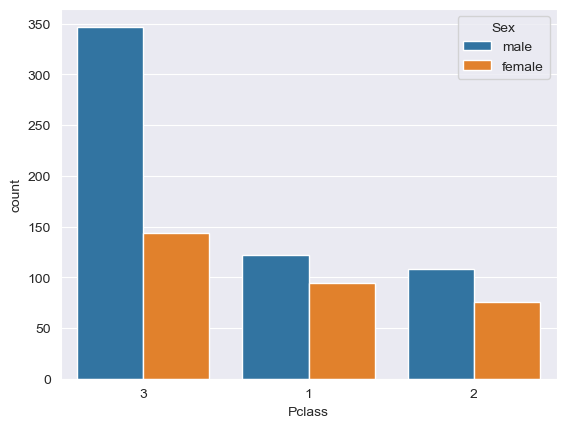

In [10]:
sns.countplot(titanic_df, x='Pclass',hue='Sex')

In [11]:
def male_female_child(passenger):
    age,sex = passenger

    if age < 16:
        return 'child'
    else:
        return sex

In [12]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [13]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


<Axes: xlabel='Pclass', ylabel='count'>

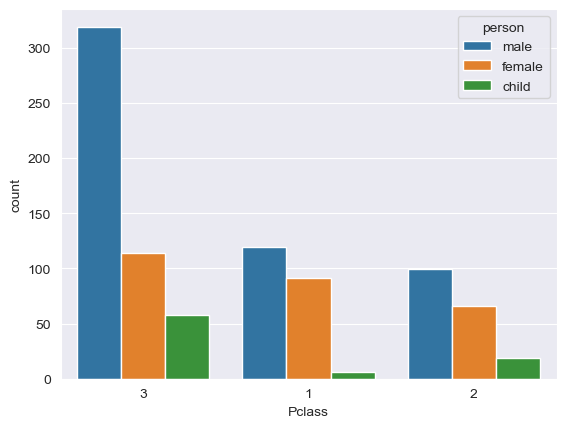

In [14]:
sns.countplot(titanic_df,x='Pclass',hue='person')

<Axes: xlabel='Pclass', ylabel='count'>

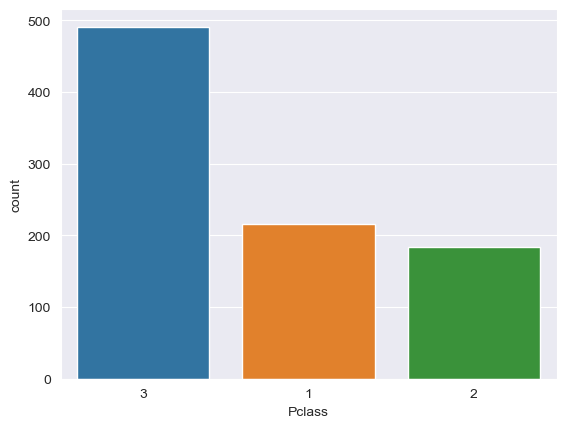

In [60]:
sns.countplot(x = 'Pclass',data = titanic_df,order = titanic_df['Pclass'].value_counts().index)


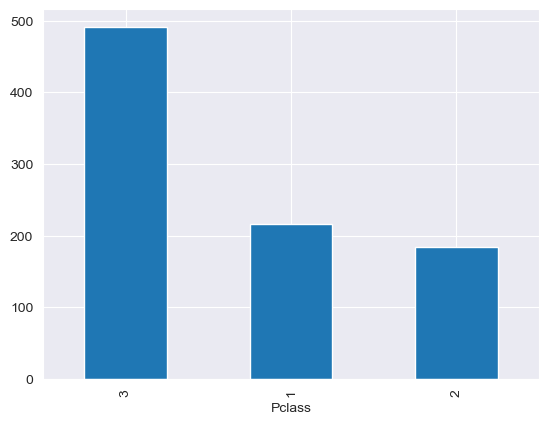

In [16]:
titanic_df['Pclass'].value_counts().plot(kind="bar")

plt.show()

<Axes: >

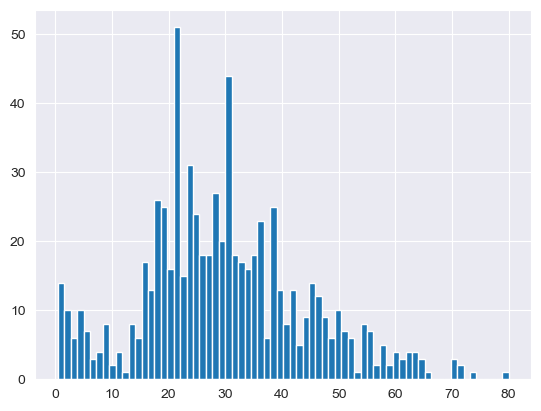

In [17]:
titanic_df['Age'].hist(bins=70)

In [18]:
titanic_df['Age'].mean()

29.69911764705882

In [19]:
titanic_df['person'].value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

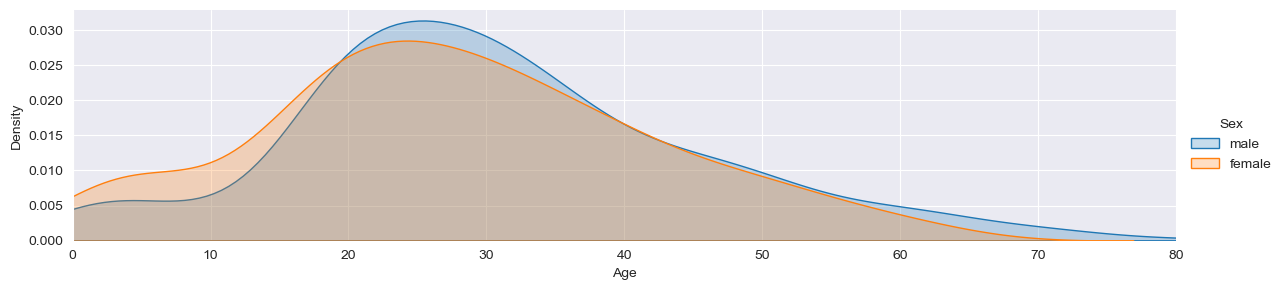

In [20]:
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

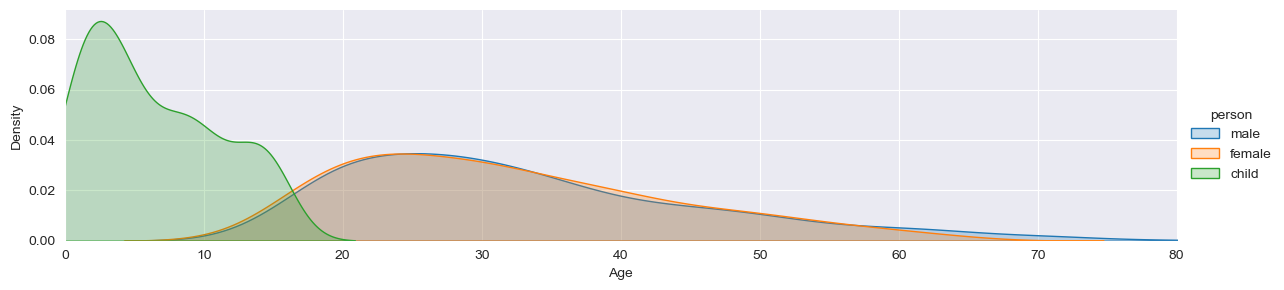

In [21]:
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

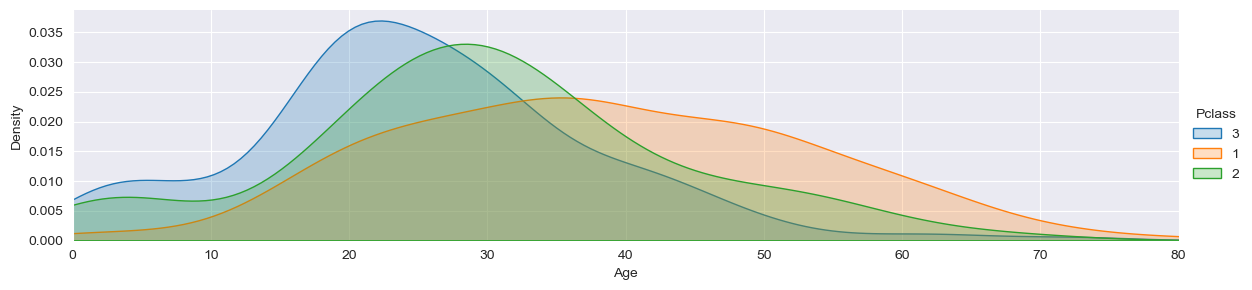

In [22]:
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)

oldest = titanic_df['Age'].max()

fig.set(xlim=(0,oldest))

fig.add_legend()

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [24]:
deck = titanic_df['Cabin'].dropna()

In [25]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

<Axes: xlabel='Cabin', ylabel='count'>

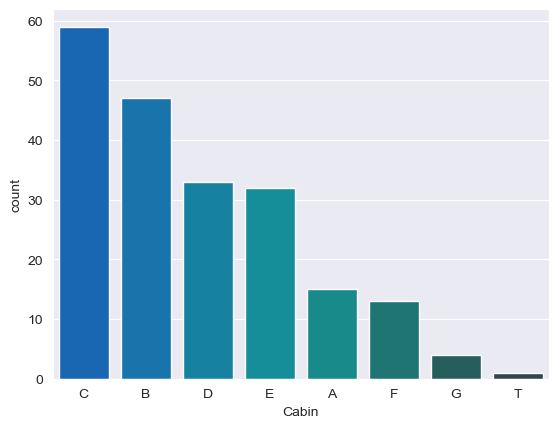

In [26]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot(x='Cabin',data=cabin_df,order=cabin_df['Cabin'].value_counts(ascending=False).index,palette='winter_d')#,=levels.sort()

<Axes: xlabel='Cabin', ylabel='count'>

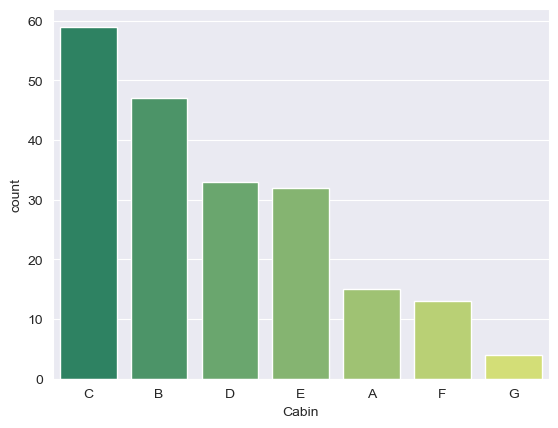

In [27]:
cabin_df = cabin_df[cabin_df.Cabin!='T']
sns.countplot(x='Cabin',data=cabin_df,order=cabin_df['Cabin'].value_counts(ascending=False).index,palette='summer')

In [28]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [29]:
titanic_df['Pclass'].unique()

array(['3', '1', '2'], dtype=object)

<Axes: xlabel='Embarked', ylabel='count'>

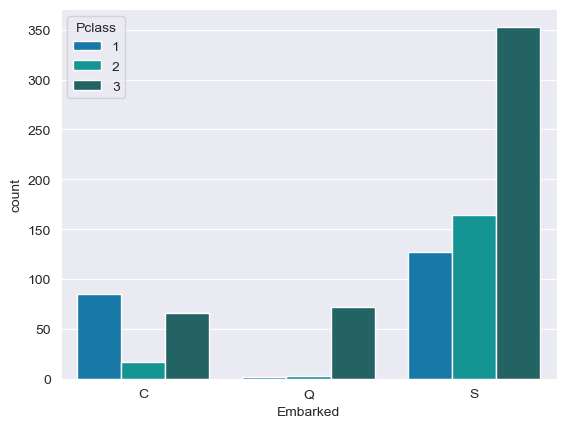

In [59]:
sns.countplot(titanic_df,x='Embarked',hue='Pclass',order=['C','Q','S'],hue_order=['1','2','3'],palette='winter_d')

In [31]:
# Who was alone and who was with family?
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [32]:
titanic_df['Alone'] = titanic_df.SibSp +titanic_df.Parch

In [33]:
titanic_df['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [34]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

C:\Users\lumul\AppData\Local\Temp\ipykernel_15452\1259996613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'
C:\Users\lumul\AppData\Local\Temp\ipykernel_15452\1259996613.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'With Family' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'With Family'


In [35]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


<Axes: xlabel='Alone', ylabel='count'>

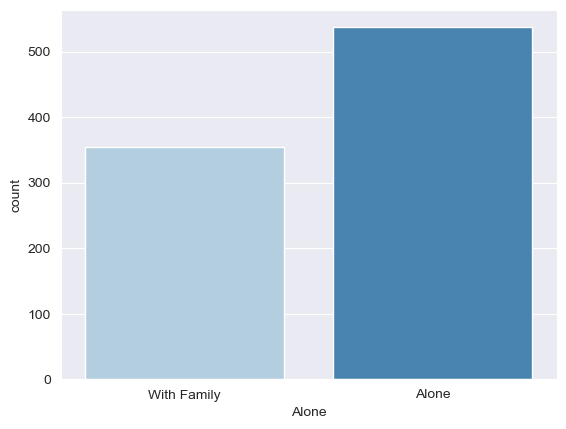

In [36]:
sns.countplot(x='Alone',data=titanic_df,palette='Blues')

<Axes: xlabel='Survivor', ylabel='count'>

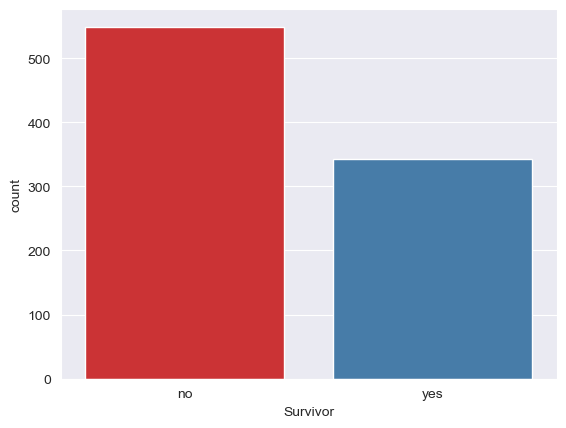

In [37]:
# What factors helped someone?
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.countplot(x='Survivor', data=titanic_df,palette='Set1')


<Axes: xlabel='Survivor', ylabel='count'>

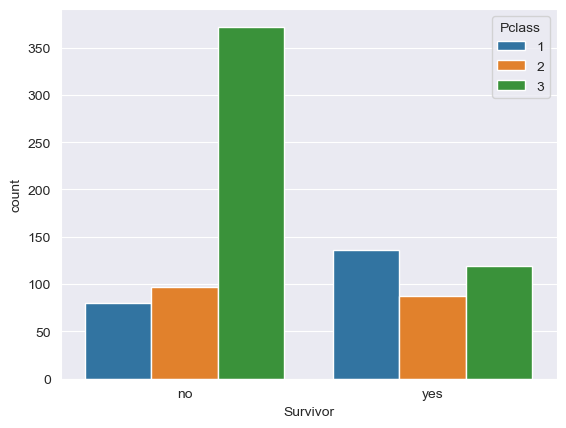

In [58]:
sns.countplot(x='Survivor',hue='Pclass',data=titanic_df,hue_order=['1','2','3'])

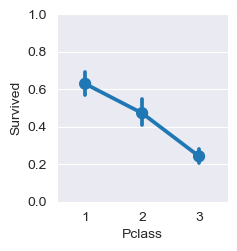

In [79]:
fig = sns.PairGrid(titanic_df,x_vars='Pclass',y_vars='Survived')
fig.map(sns.pointplot,order=['1','2','3'])

fig.set(ylim=(0, 1))

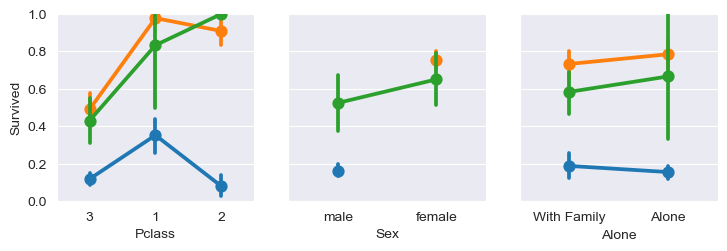

In [92]:
fig = sns.PairGrid(titanic_df, y_vars="Survived",x_vars=["Pclass", "Sex", "Alone"],hue='person')
fig.map(sns.pointplot)

fig.set(ylim=(0, 1))

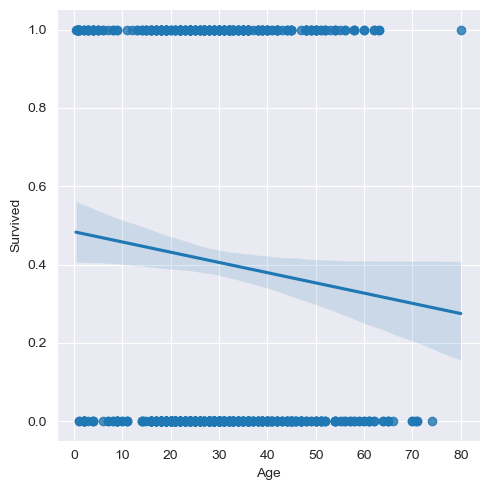

In [41]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)

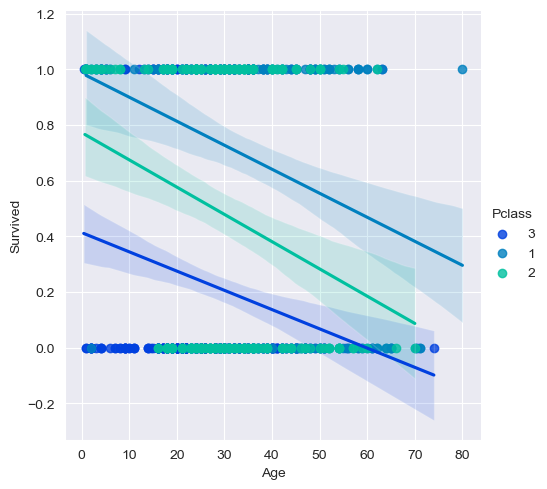

In [42]:
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter')

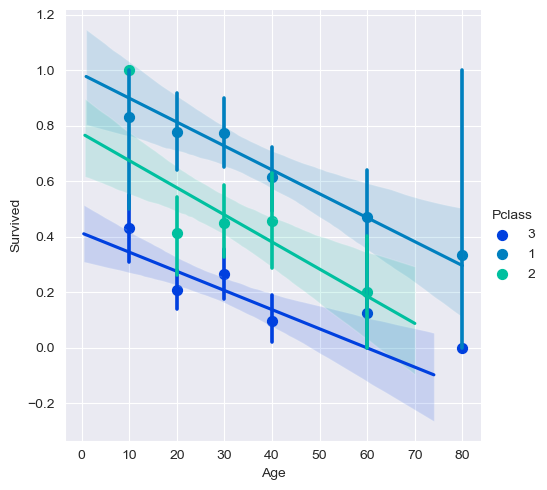

In [53]:
generations = [10,20,30,40,60,80]

sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

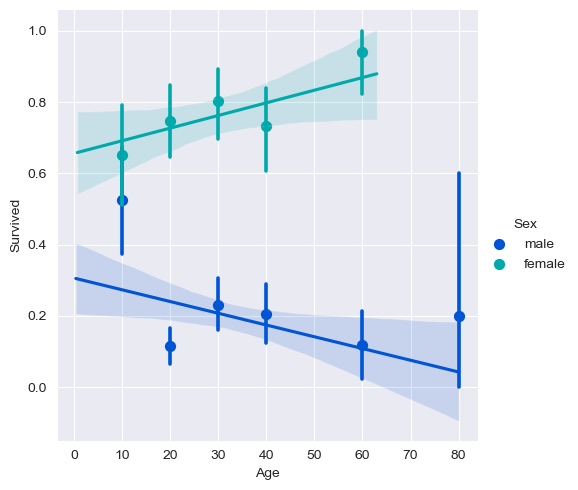

In [44]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

In [69]:
# did the deck have an effect on the passegners survival rate? 

In [70]:
titanic_df['Cabin'] = DataFrame(levels)

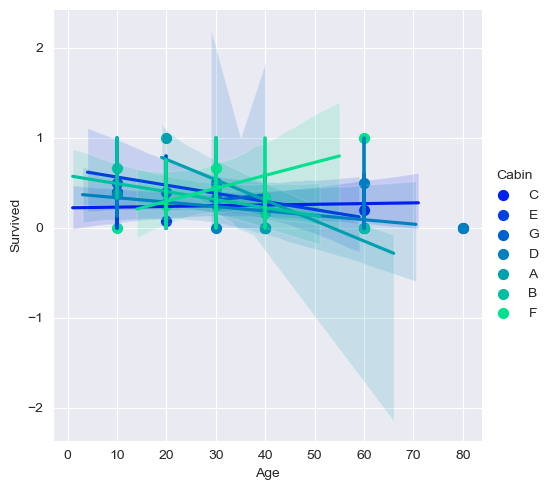

In [71]:
sns.lmplot(x='Age',y='Survived',hue='Cabin',data=cabin_c,palette='winter',x_bins=generations)

In [48]:
# did having a family member increase the odds of surviving the crash?

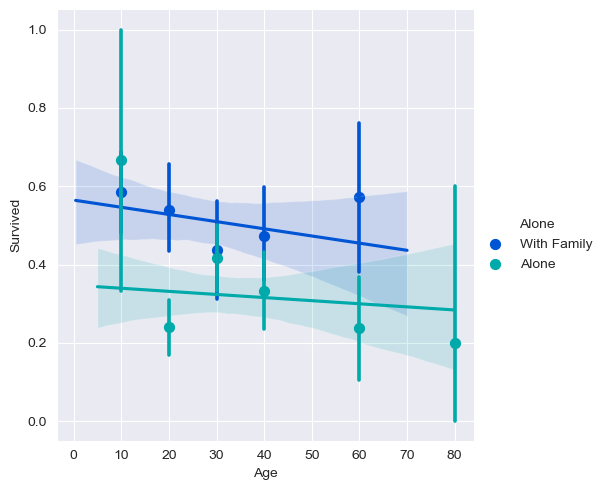

In [49]:
sns.lmplot(x='Age',y='Survived',hue='Alone',data=titanic_df,palette='winter',x_bins=generations)